# Import Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [81]:
# import data
df = pd.read_csv('../data/breast_cancer_wisconsin.csv')
df.sample(5)

,ID,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
96,1165297,2,1,1,2,2,1,1,1,1,2
562,1328331,1,1,1,1,2,1,3,1,1,2
657,1333877,5,4,5,1,8,1,3,6,1,2
464,1293966,4,1,1,1,2,1,1,1,1,2
277,452264,1,1,1,1,2,1,2,1,1,2


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [83]:
#check for nulls in the data
df.isnull().sum()

ID                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [84]:
#check for na in the data
df.isna().sum()

ID                             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

There are no nulls/missing values

In [85]:
#check for duplicates in the data
df.duplicated().sum()

8

In [86]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)

#describe the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,691.0,NaN,NaN,NaN,1073333.435601,619295.297098,61634.0,872549.0,1171710.0,1238437.0,13454352.0
clump_thickness,691.0,NaN,NaN,NaN,4.426918,2.815861,1.0,2.0,4.0,6.0,10.0
uniformity_of_cell_size,691.0,NaN,NaN,NaN,3.130246,3.041328,1.0,1.0,1.0,5.0,10.0
uniformity_of_cell_shape,691.0,NaN,NaN,NaN,3.201158,2.959886,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,691.0,NaN,NaN,NaN,2.824891,2.866552,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,691.0,NaN,NaN,NaN,3.211288,2.199852,1.0,2.0,2.0,4.0,10.0
bare_nuclei,691,11,1,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bland_chromatin,691.0,NaN,NaN,NaN,3.435601,2.442345,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,691.0,NaN,NaN,NaN,2.882779,3.066298,1.0,1.0,1.0,4.0,10.0
mitoses,691.0,NaN,NaN,NaN,1.593343,1.723129,1.0,1.0,1.0,1.0,10.0


In [87]:
#drop ID column
df_no_ID = df.drop('ID', axis=1).copy()

df_no_ID['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [88]:
#replace a value
df_no_ID['bare_nuclei'] = df_no_ID['bare_nuclei'].replace('?', 0)

#convert to int
df_no_ID['bare_nuclei'] = df_no_ID['bare_nuclei'].astype(int)

#note the spread of the classes
df_no_ID['class'].value_counts(normalize=True)

2    0.655572
4    0.344428
Name: class, dtype: float64

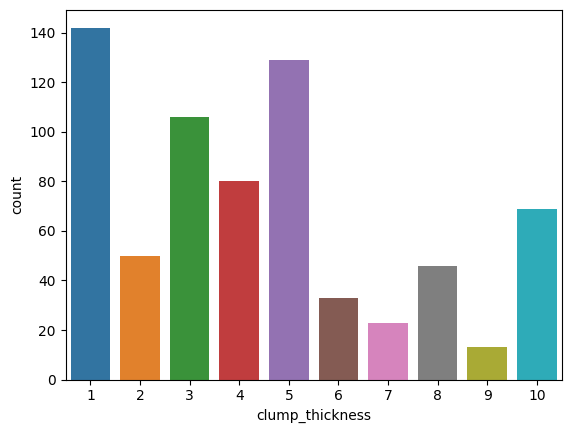

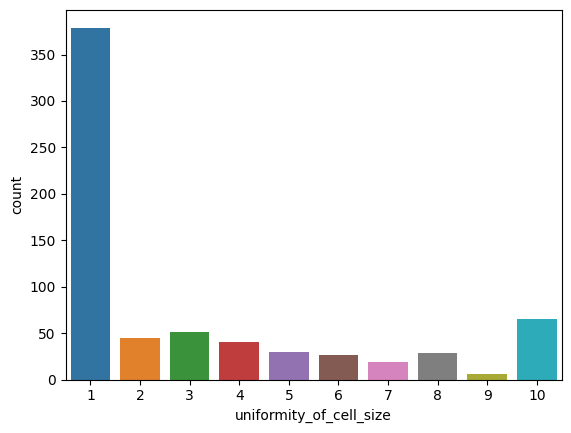

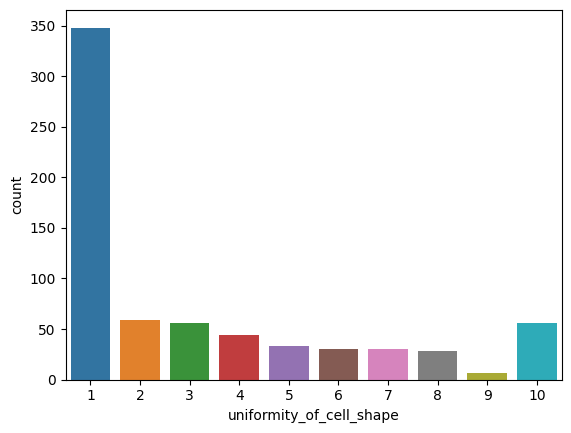

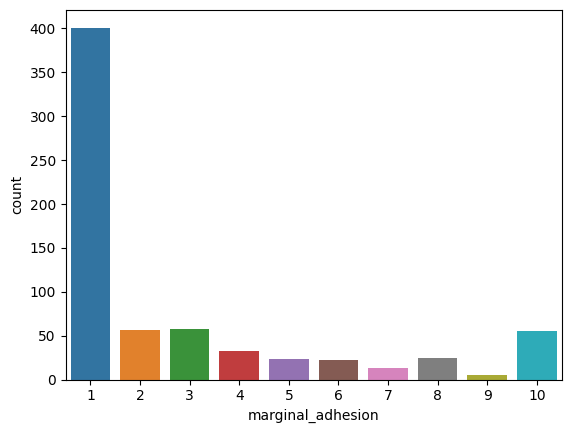

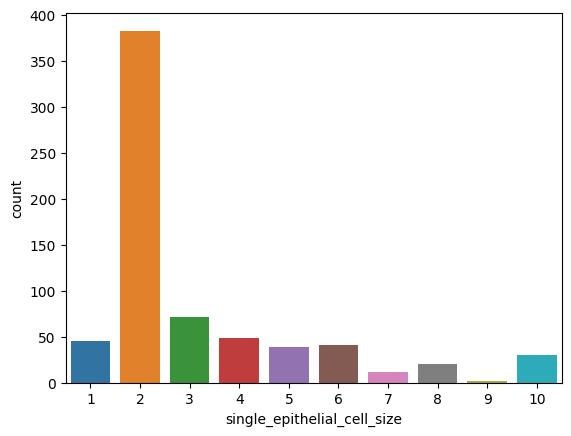

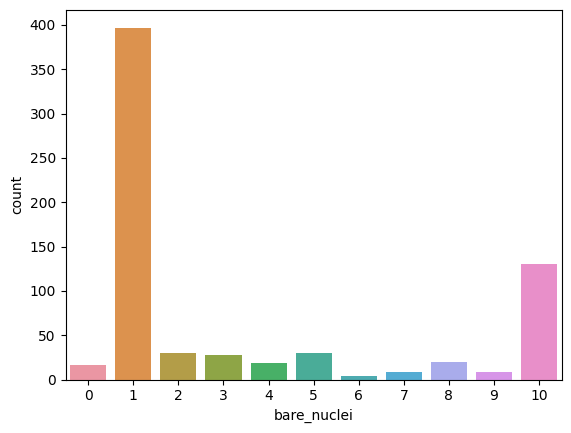

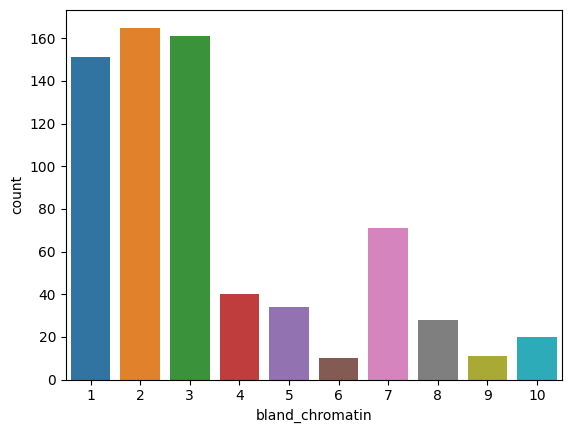

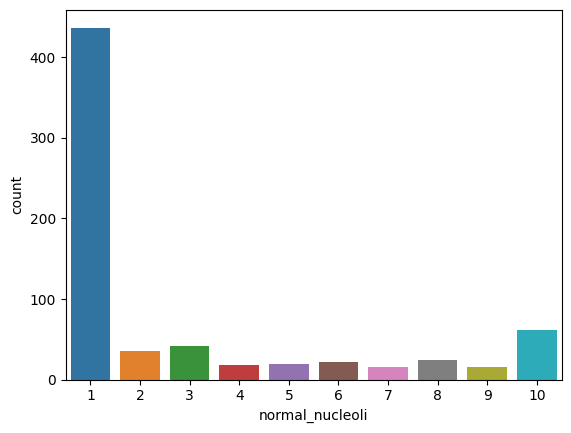

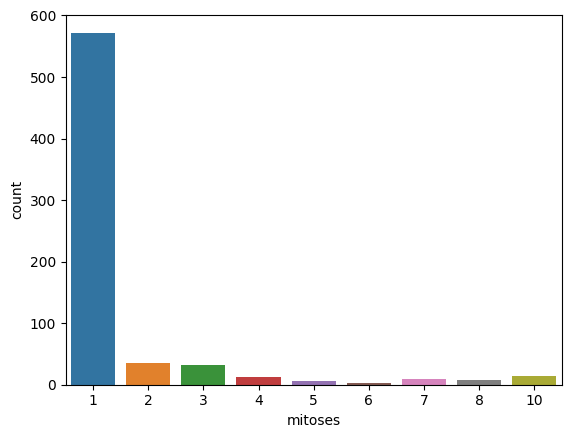

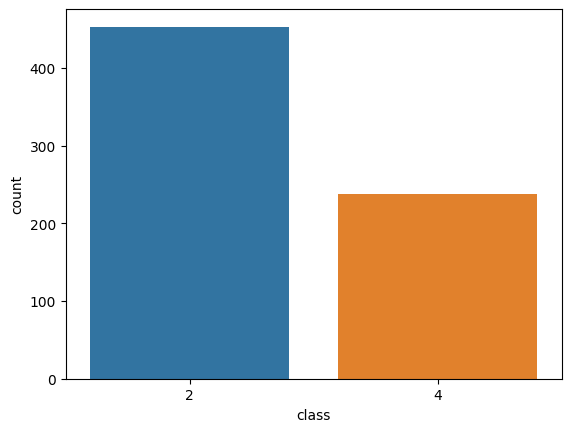

In [89]:
#function for count plot of one column
def count_plot(df, column):
    sns.countplot(data=df, x=column)
    plt.show()

#for loop to plot count plot for each column
for column in df_no_ID.columns:
    count_plot(df_no_ID, column)

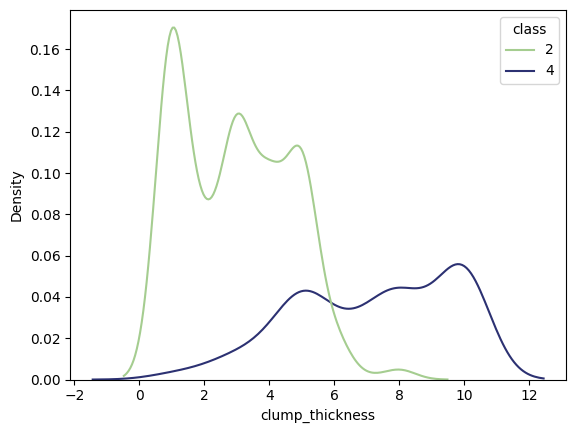

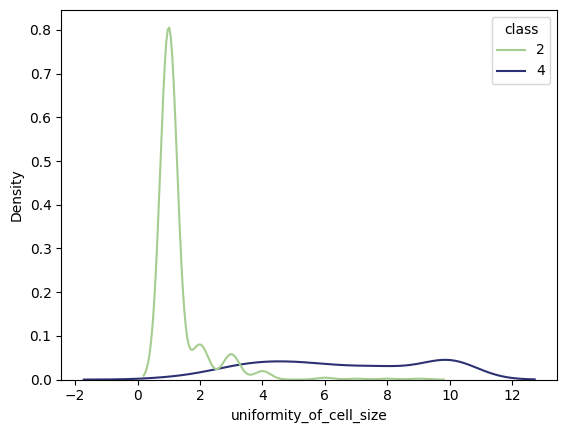

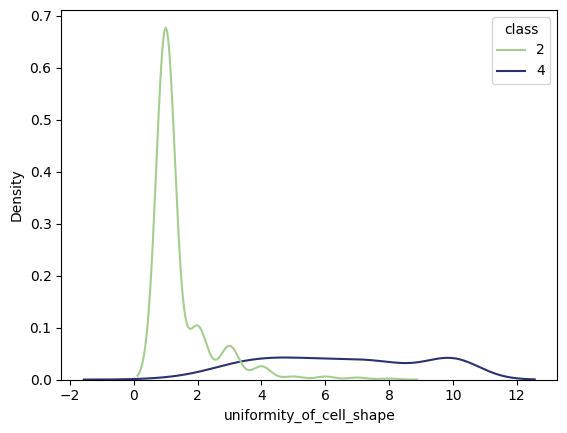

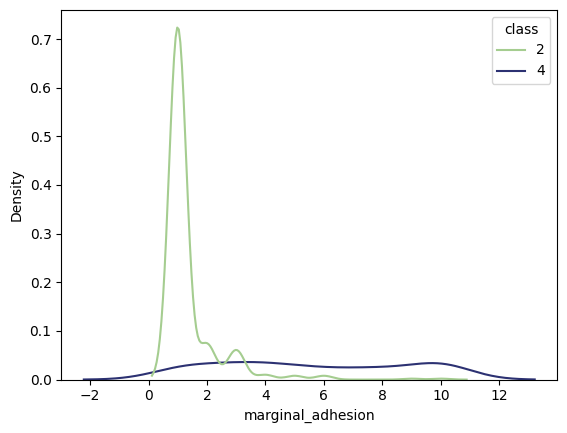

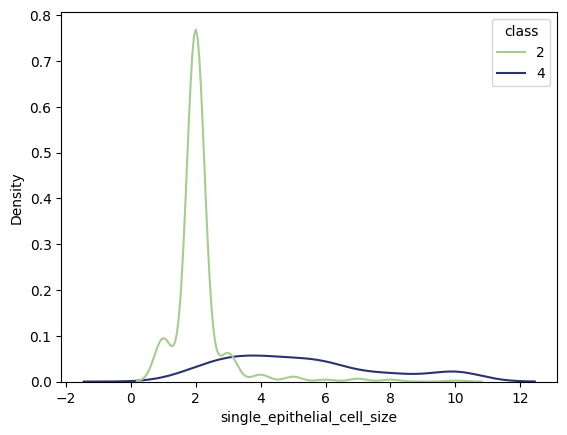

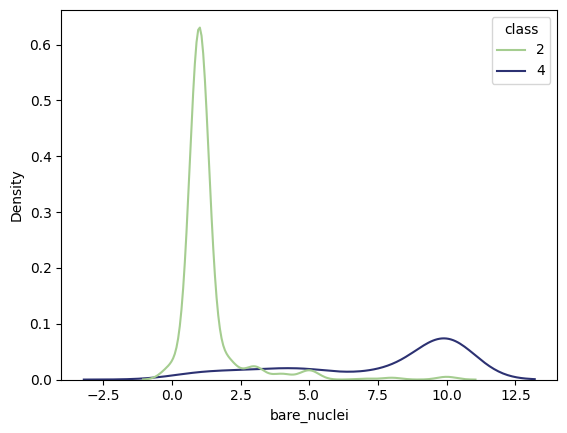

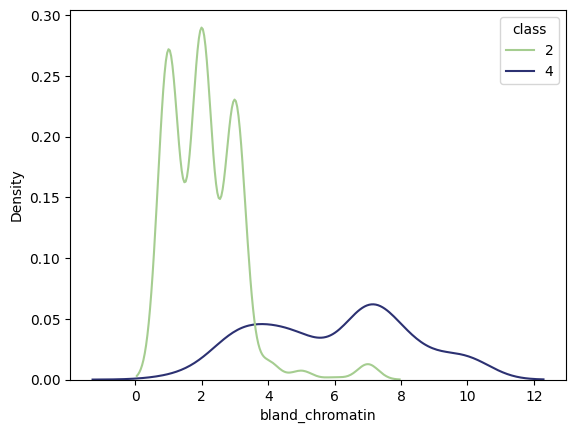

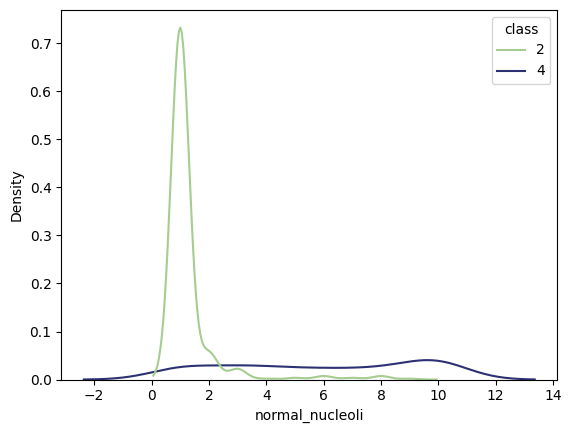

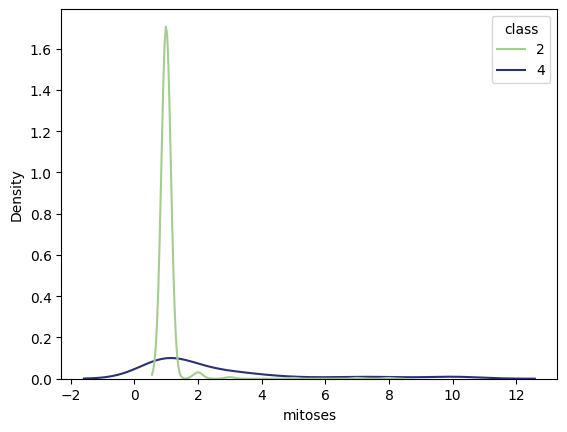

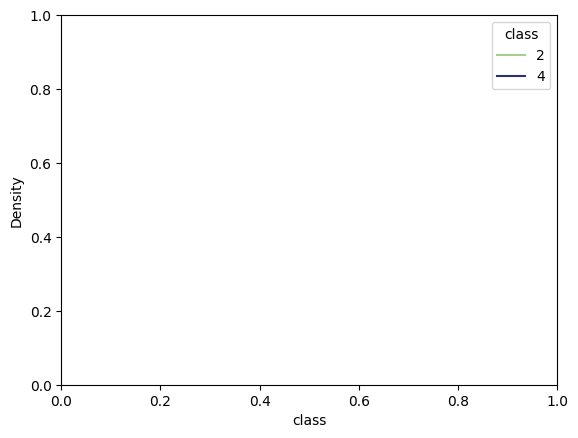

In [90]:
#function for kde plot of one column
def kde_plot(df, column):
    sns.kdeplot(data=df, x=column, hue='class',palette="crest")
    plt.show()

#for loop to plot count plot for each column
for column in df_no_ID.columns:
    kde_plot(df_no_ID, column)

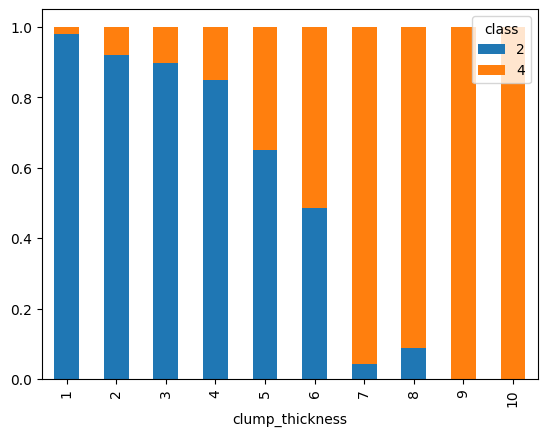

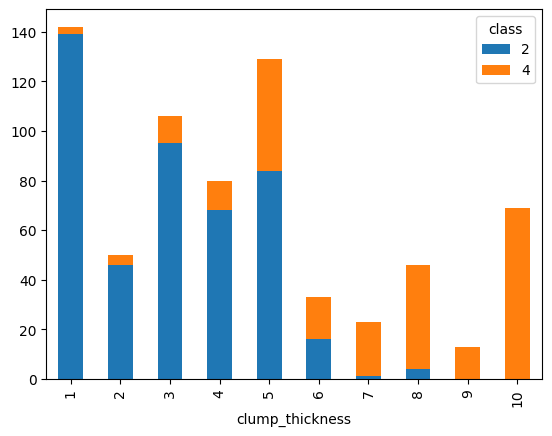

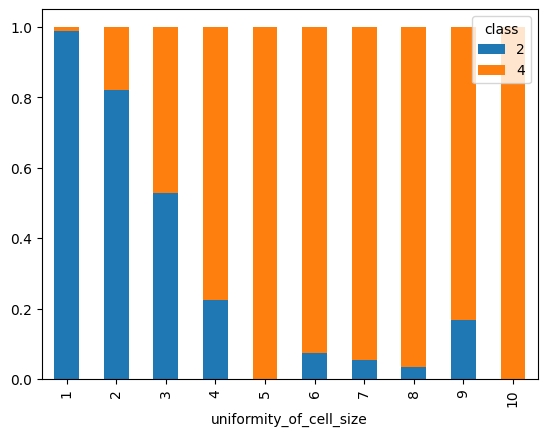

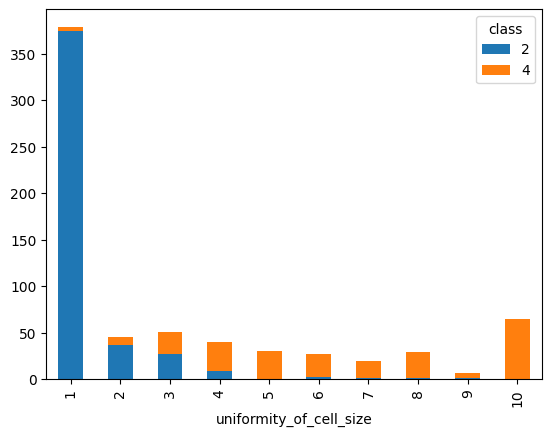

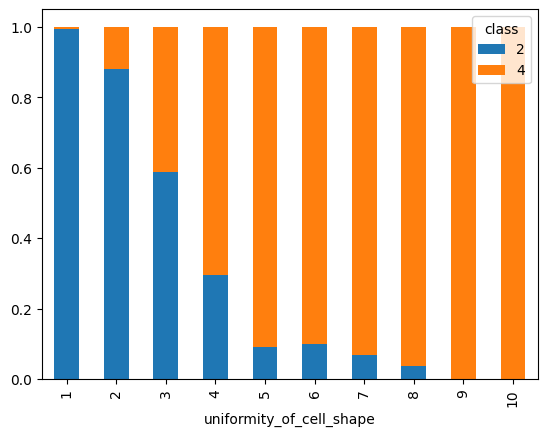

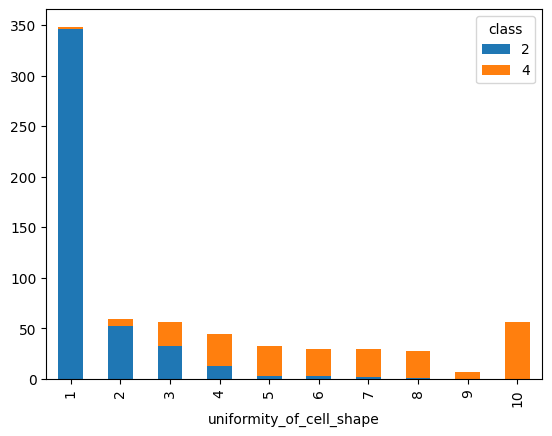

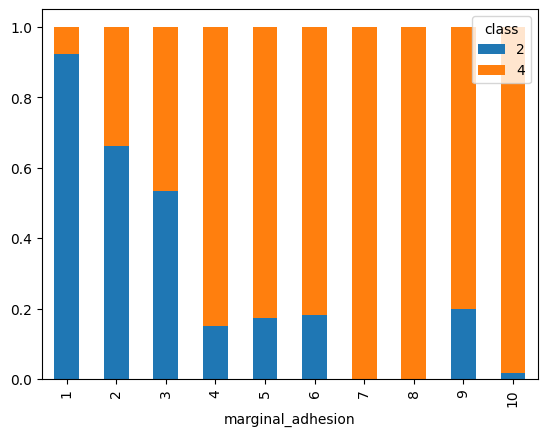

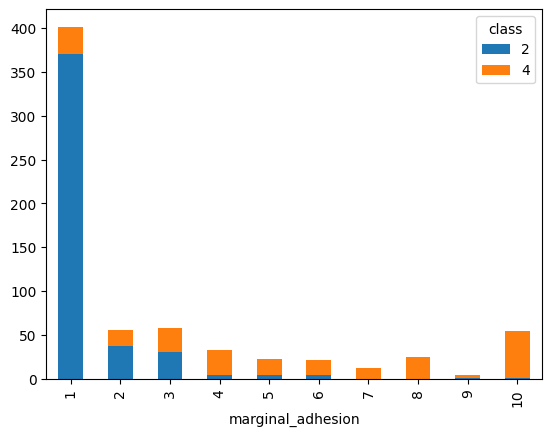

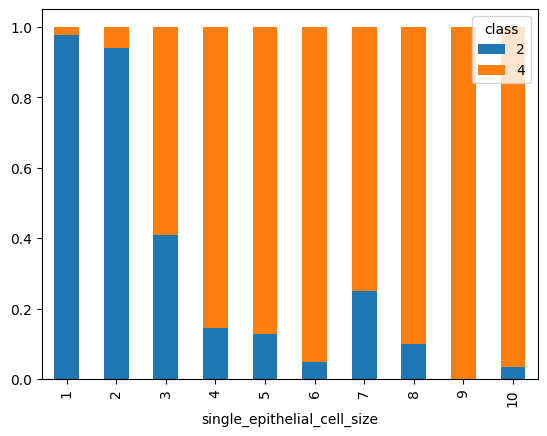

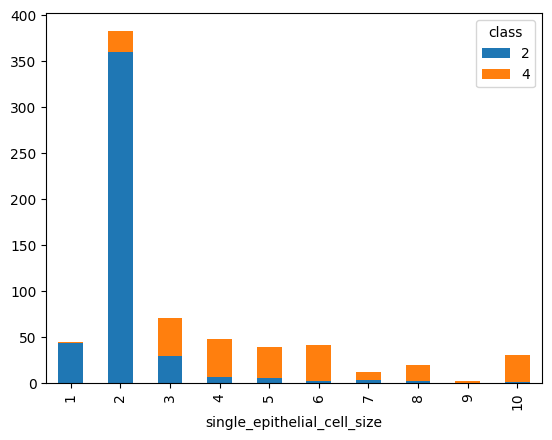

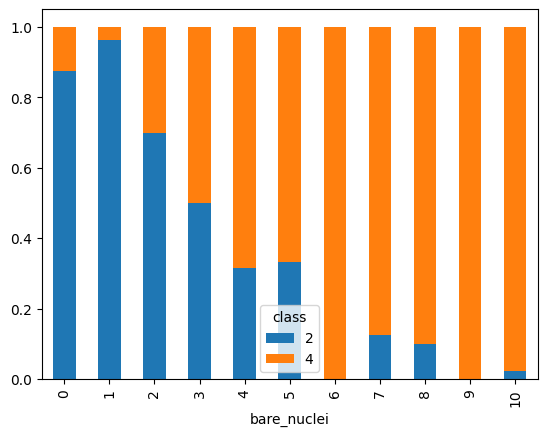

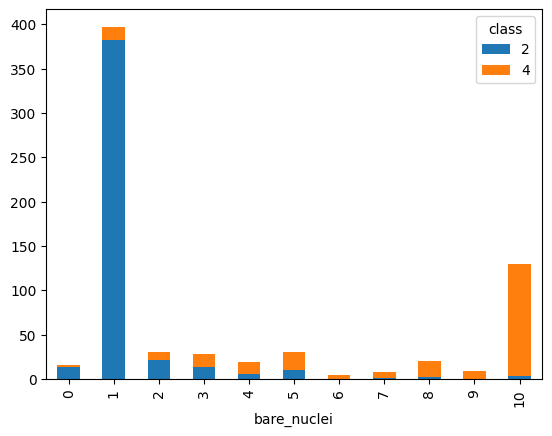

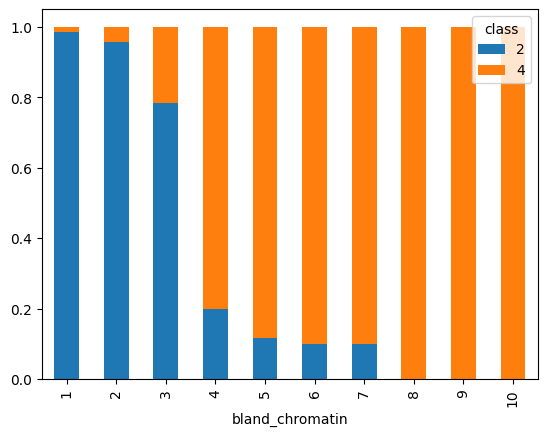

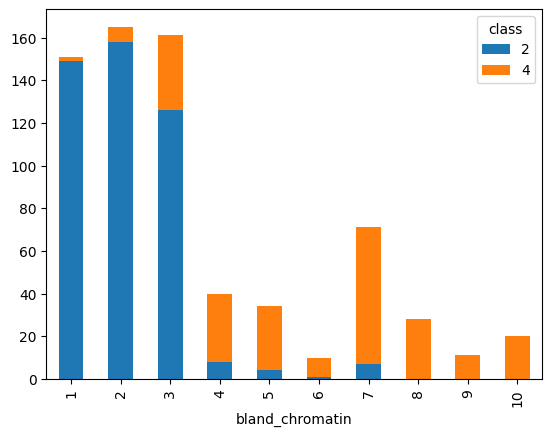

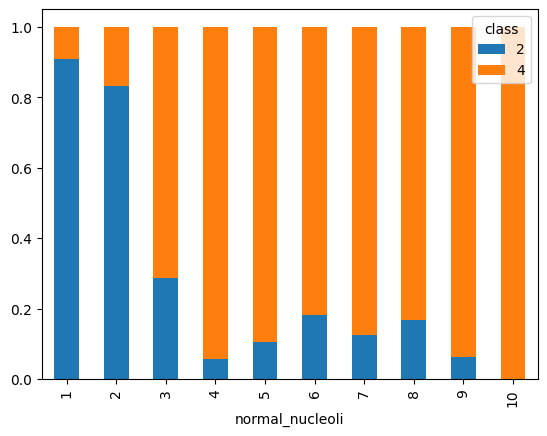

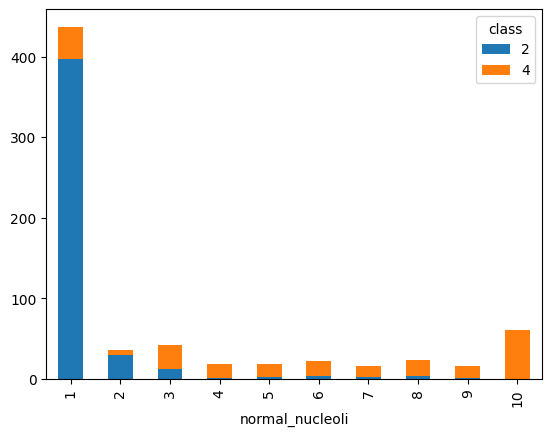

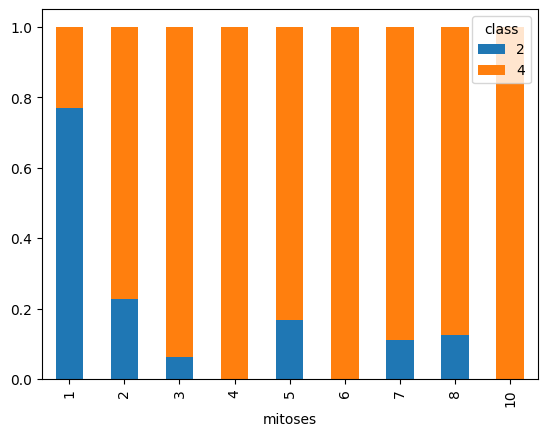

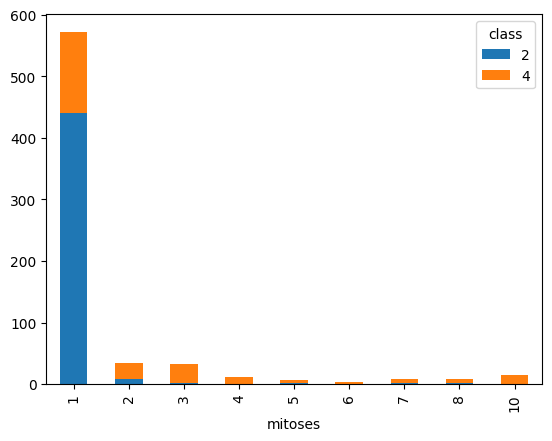

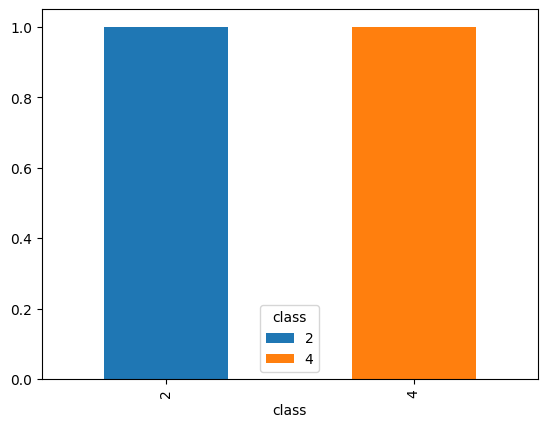

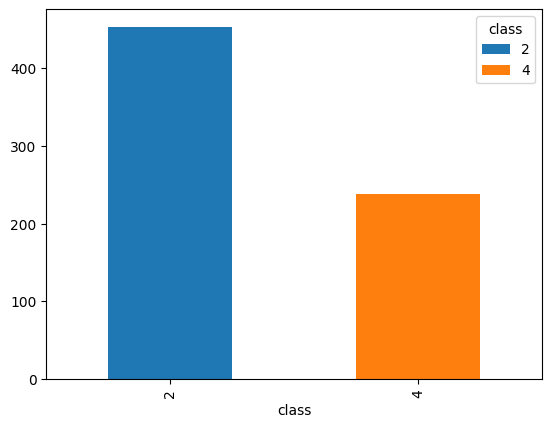

In [91]:
#function for stacked plot of one column
def stacked_plot(df, column):
    df.groupby([column])['class'].value_counts(normalize=True).unstack().replace(np.nan, 0).plot(kind='bar', stacked=True)
    df.groupby([column])['class'].value_counts().unstack().replace(np.nan, 0).plot(kind='bar', stacked=True)

#for loop to plot count plot for each column
for column in df_no_ID.columns:
    stacked_plot(df_no_ID, column)

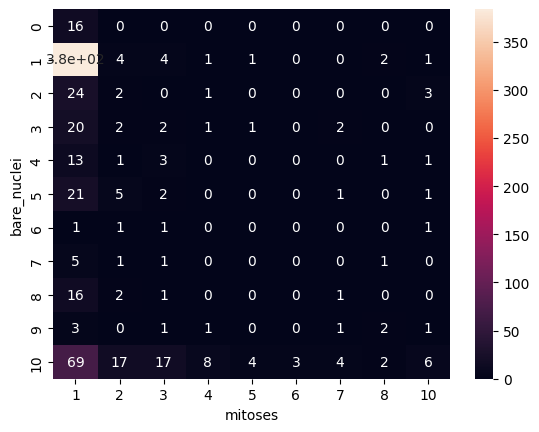

In [92]:
#heatmap of the data
sns.heatmap(df_no_ID.groupby(['bare_nuclei'])['mitoses'].value_counts().unstack().replace(np.nan, 0), annot=True)
plt.show()

In [93]:
#splitting the data as independent and dependent variables
X = df_no_ID.drop('class', axis=1)
y = df_no_ID['class']

#replace the class with 0 and 1
y = y.replace({2 : 0, 4 : 1})

#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y_train.value_counts(normalize=True)

0    0.656315
1    0.343685
Name: class, dtype: float64

In [94]:
y_test.value_counts(normalize=True)

0    0.653846
1    0.346154
Name: class, dtype: float64

# Decision Tree

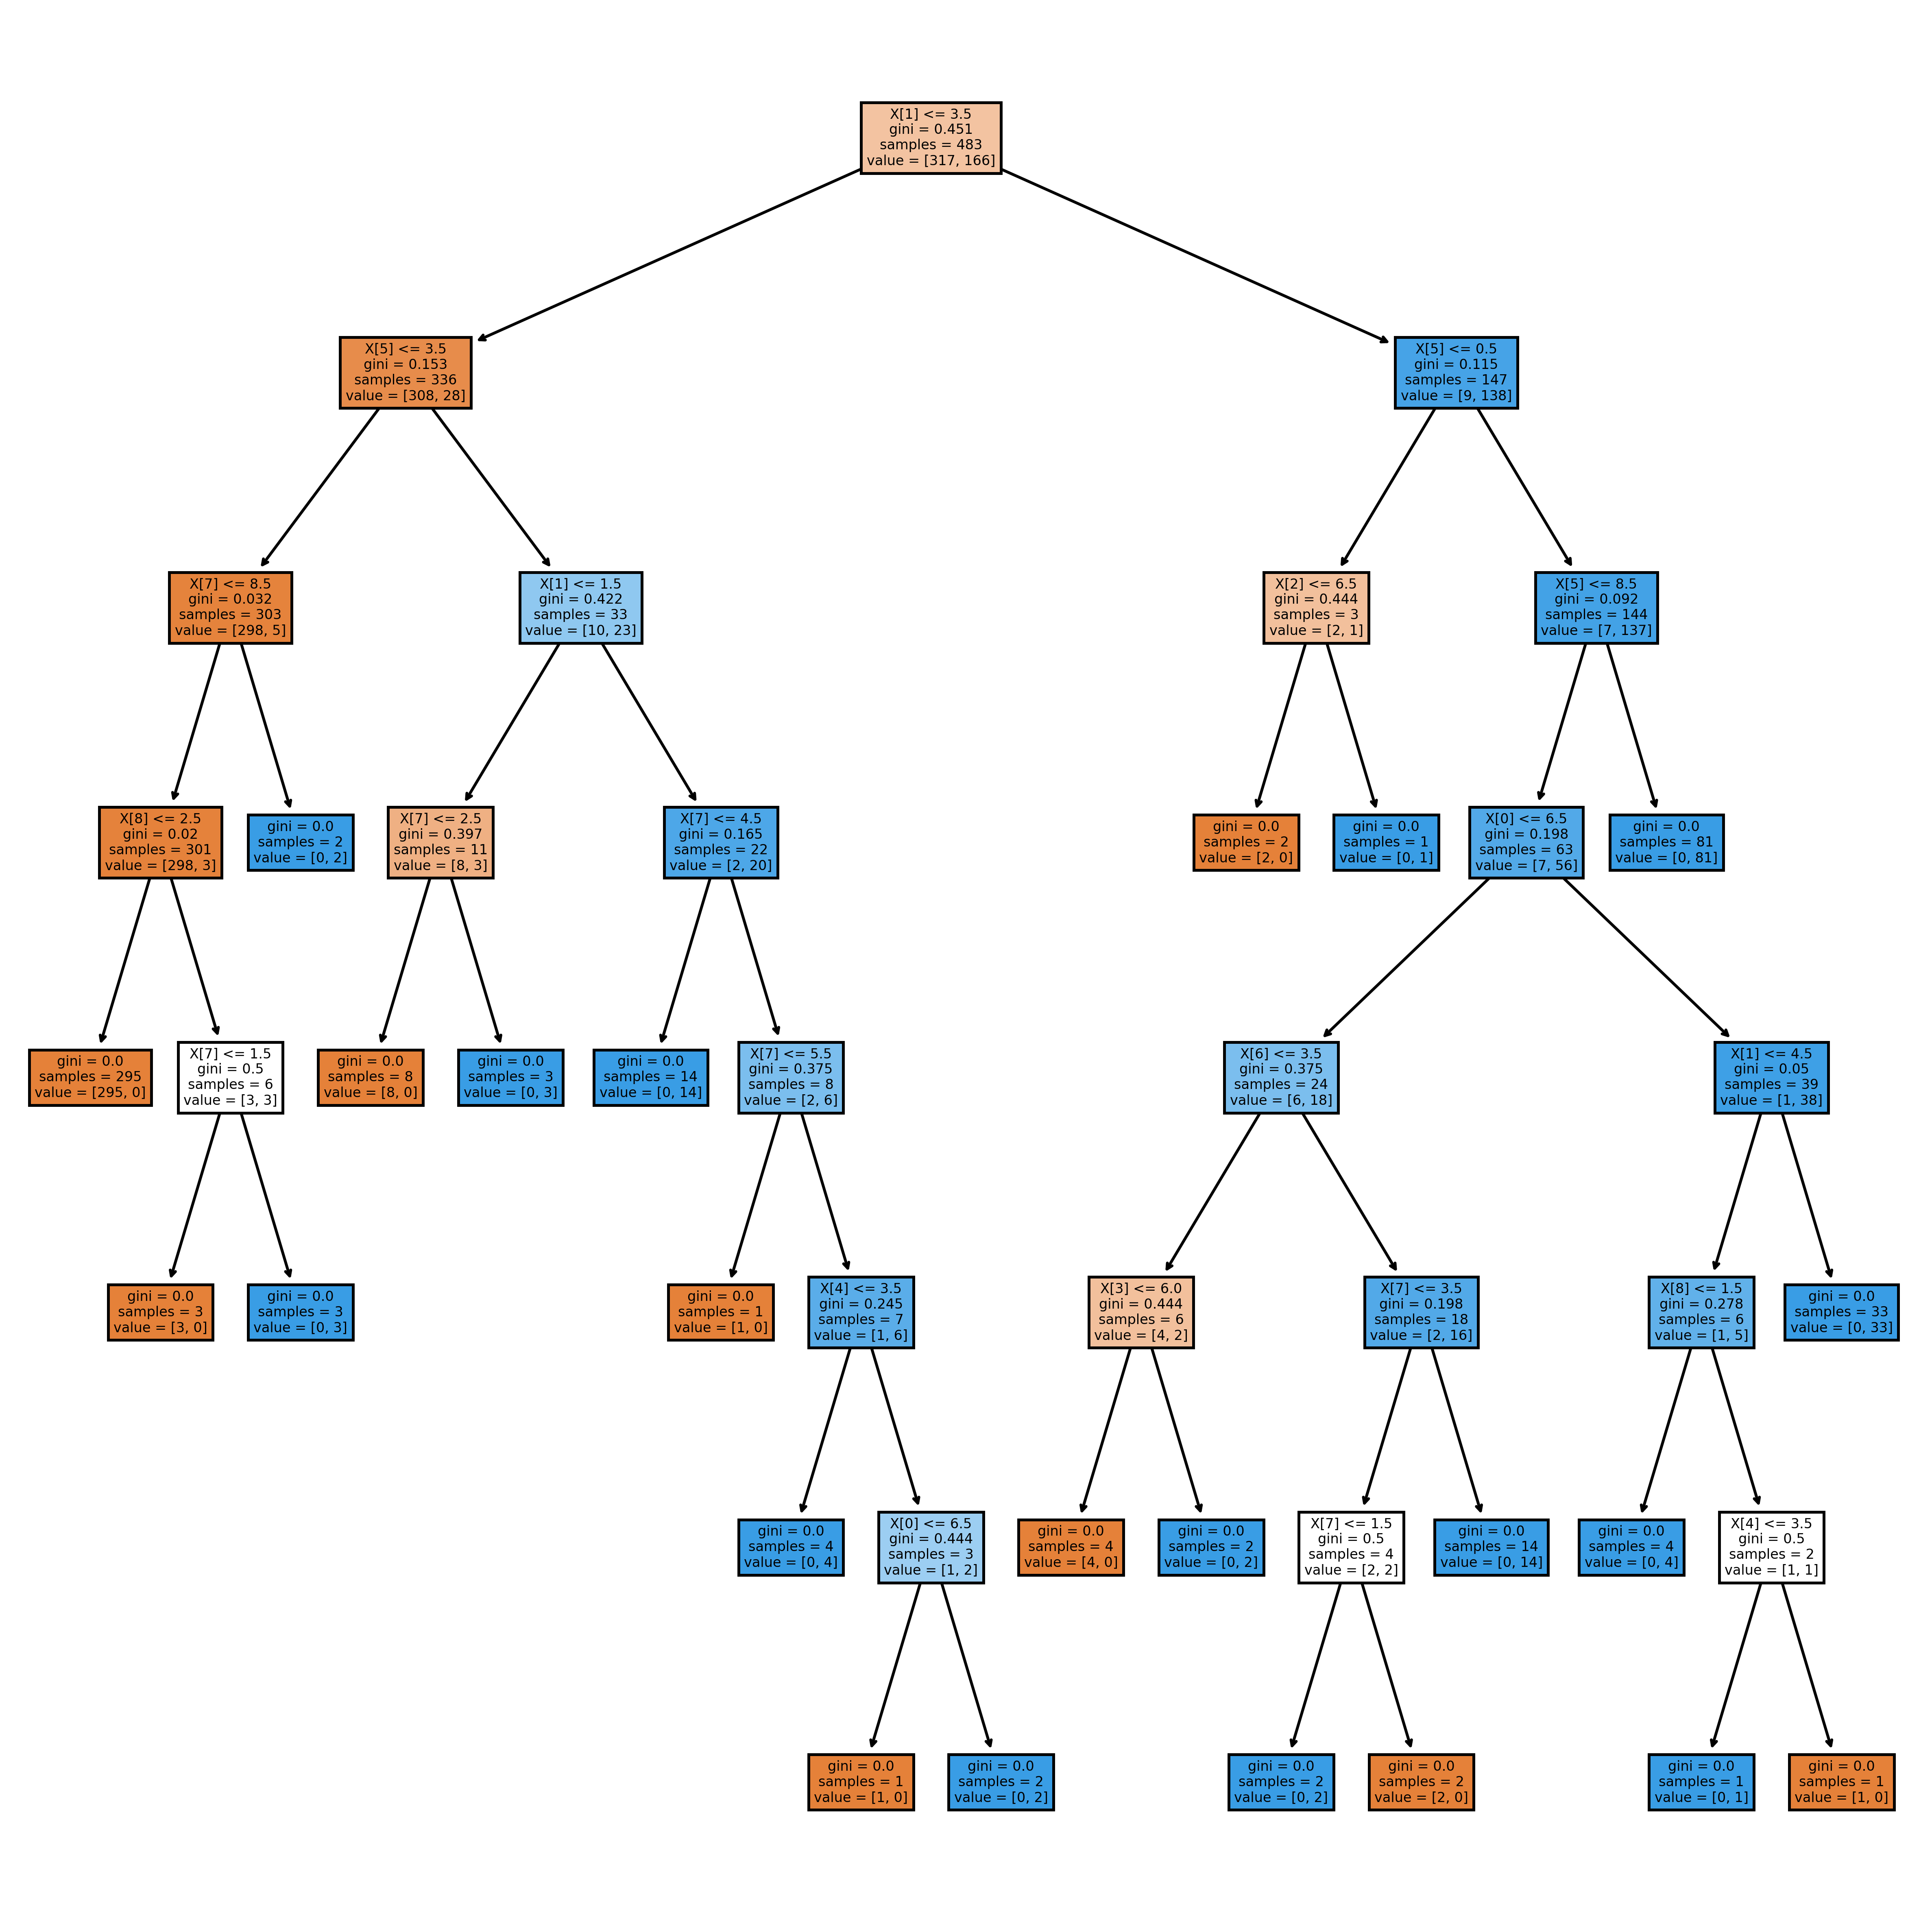

In [95]:
#Decision Tree
#create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

#fit data to model
dtc.fit(X_train, y_train)

#import libraries to plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plot the decision tree
plt.figure(figsize=(12, 12), dpi=500)
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



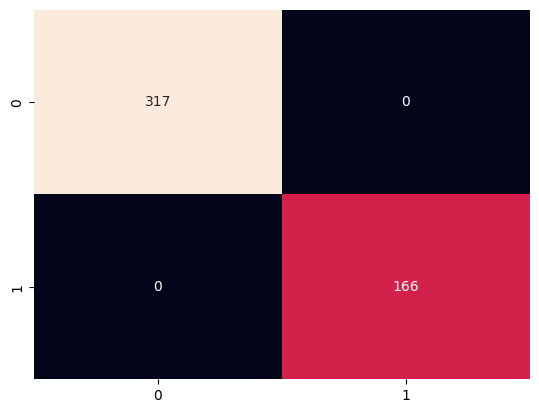

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       136
           1       0.93      0.88      0.90        72

    accuracy                           0.93       208
   macro avg       0.93      0.92      0.92       208
weighted avg       0.93      0.93      0.93       208



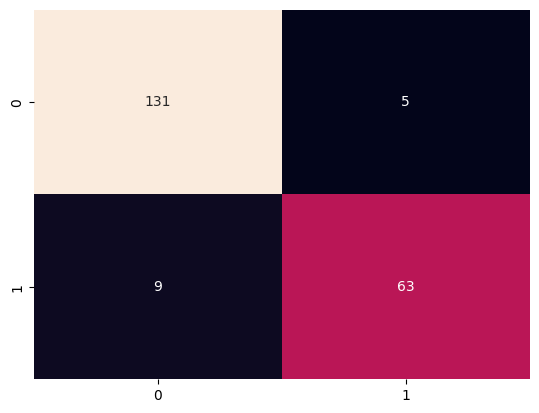

In [96]:
#import libraries to evaulate the model
from sklearn.metrics import classification_report, confusion_matrix
#predict the class from the model
ytrain_pred = dtc.predict(X_train)
#evaluate the model
print(classification_report(y_train, ytrain_pred))
#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()
print("------------------------------------------------------")
#predict the class from the model on the test data
ytest_pred = dtc.predict(X_test)
#evaluate the model on the test data
print(classification_report(y_test, ytest_pred))
#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

In [97]:
#find cost complexity pruning path for the decision tree
path=dtc.cost_complexity_pruning_path(X_train, y_train)
alpha = path['ccp_alphas']

### Gridsearch

In [98]:
#import grid search
from sklearn.model_selection import GridSearchCV

#grid search for hyperparameter tuning on decision tree
param_grid = {'max_depth': np.arange(4,7),
              'min_samples_split': [5,7],
              'min_samples_leaf': [10],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_leaf_nodes': [10,12,16],
              'ccp_alpha': alpha}

#initialize the grid search object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='roc_auc',verbose=1, n_jobs=-1)

#fit the data to the grid search object
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)

#best parameters
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits
{'ccp_alpha': 0.0013448709100883003, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}


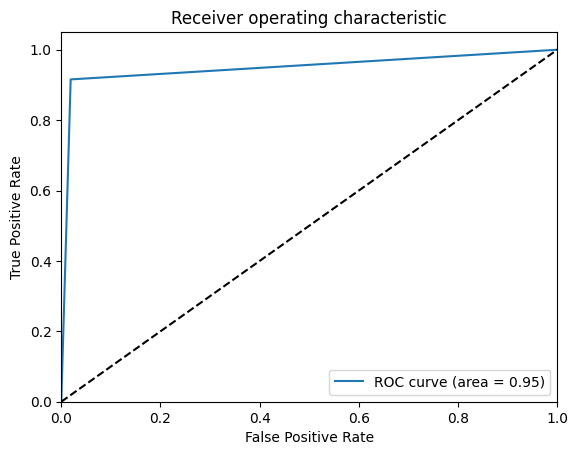

------------------------------------------------------


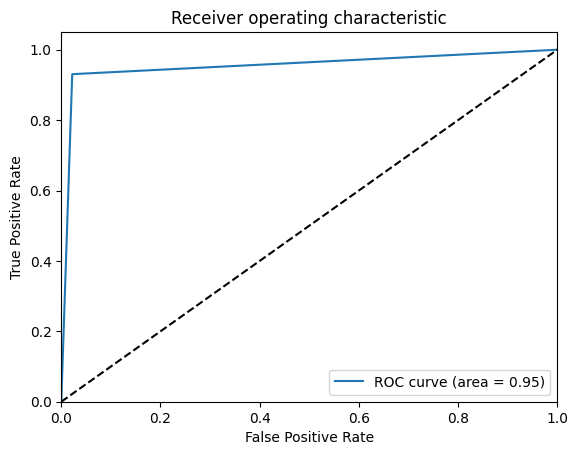

In [99]:
#import libraries to evaulate the model
from sklearn.metrics import roc_curve, roc_auc_score

#evaluate the model
ytrain_pred = best_model.predict(X_train)

#evaluate the model usinf roc_curve and roc_auc_score on train data
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)
roc_auc = roc_auc_score(y_train, ytrain_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = best_model.predict(X_test)

#evaluate the model usinf roc_curve and roc_auc_score on test data
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = roc_auc_score(y_test, ytest_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       317
           1       0.96      0.92      0.94       166

    accuracy                           0.96       483
   macro avg       0.96      0.95      0.95       483
weighted avg       0.96      0.96      0.96       483



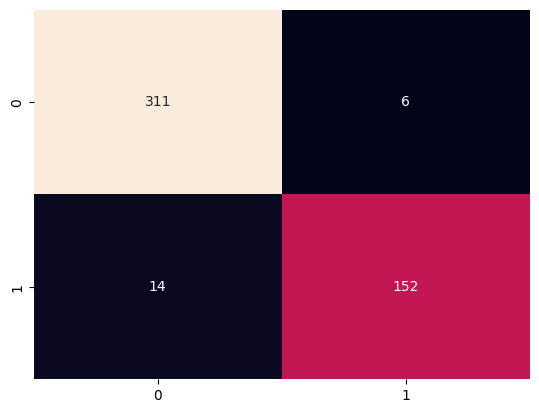

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       136
           1       0.96      0.93      0.94        72

    accuracy                           0.96       208
   macro avg       0.96      0.95      0.96       208
weighted avg       0.96      0.96      0.96       208



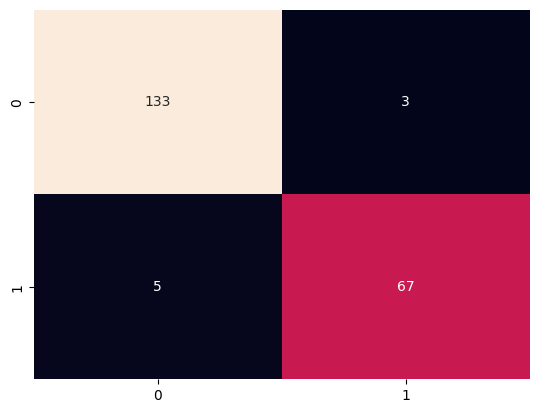

In [100]:
#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

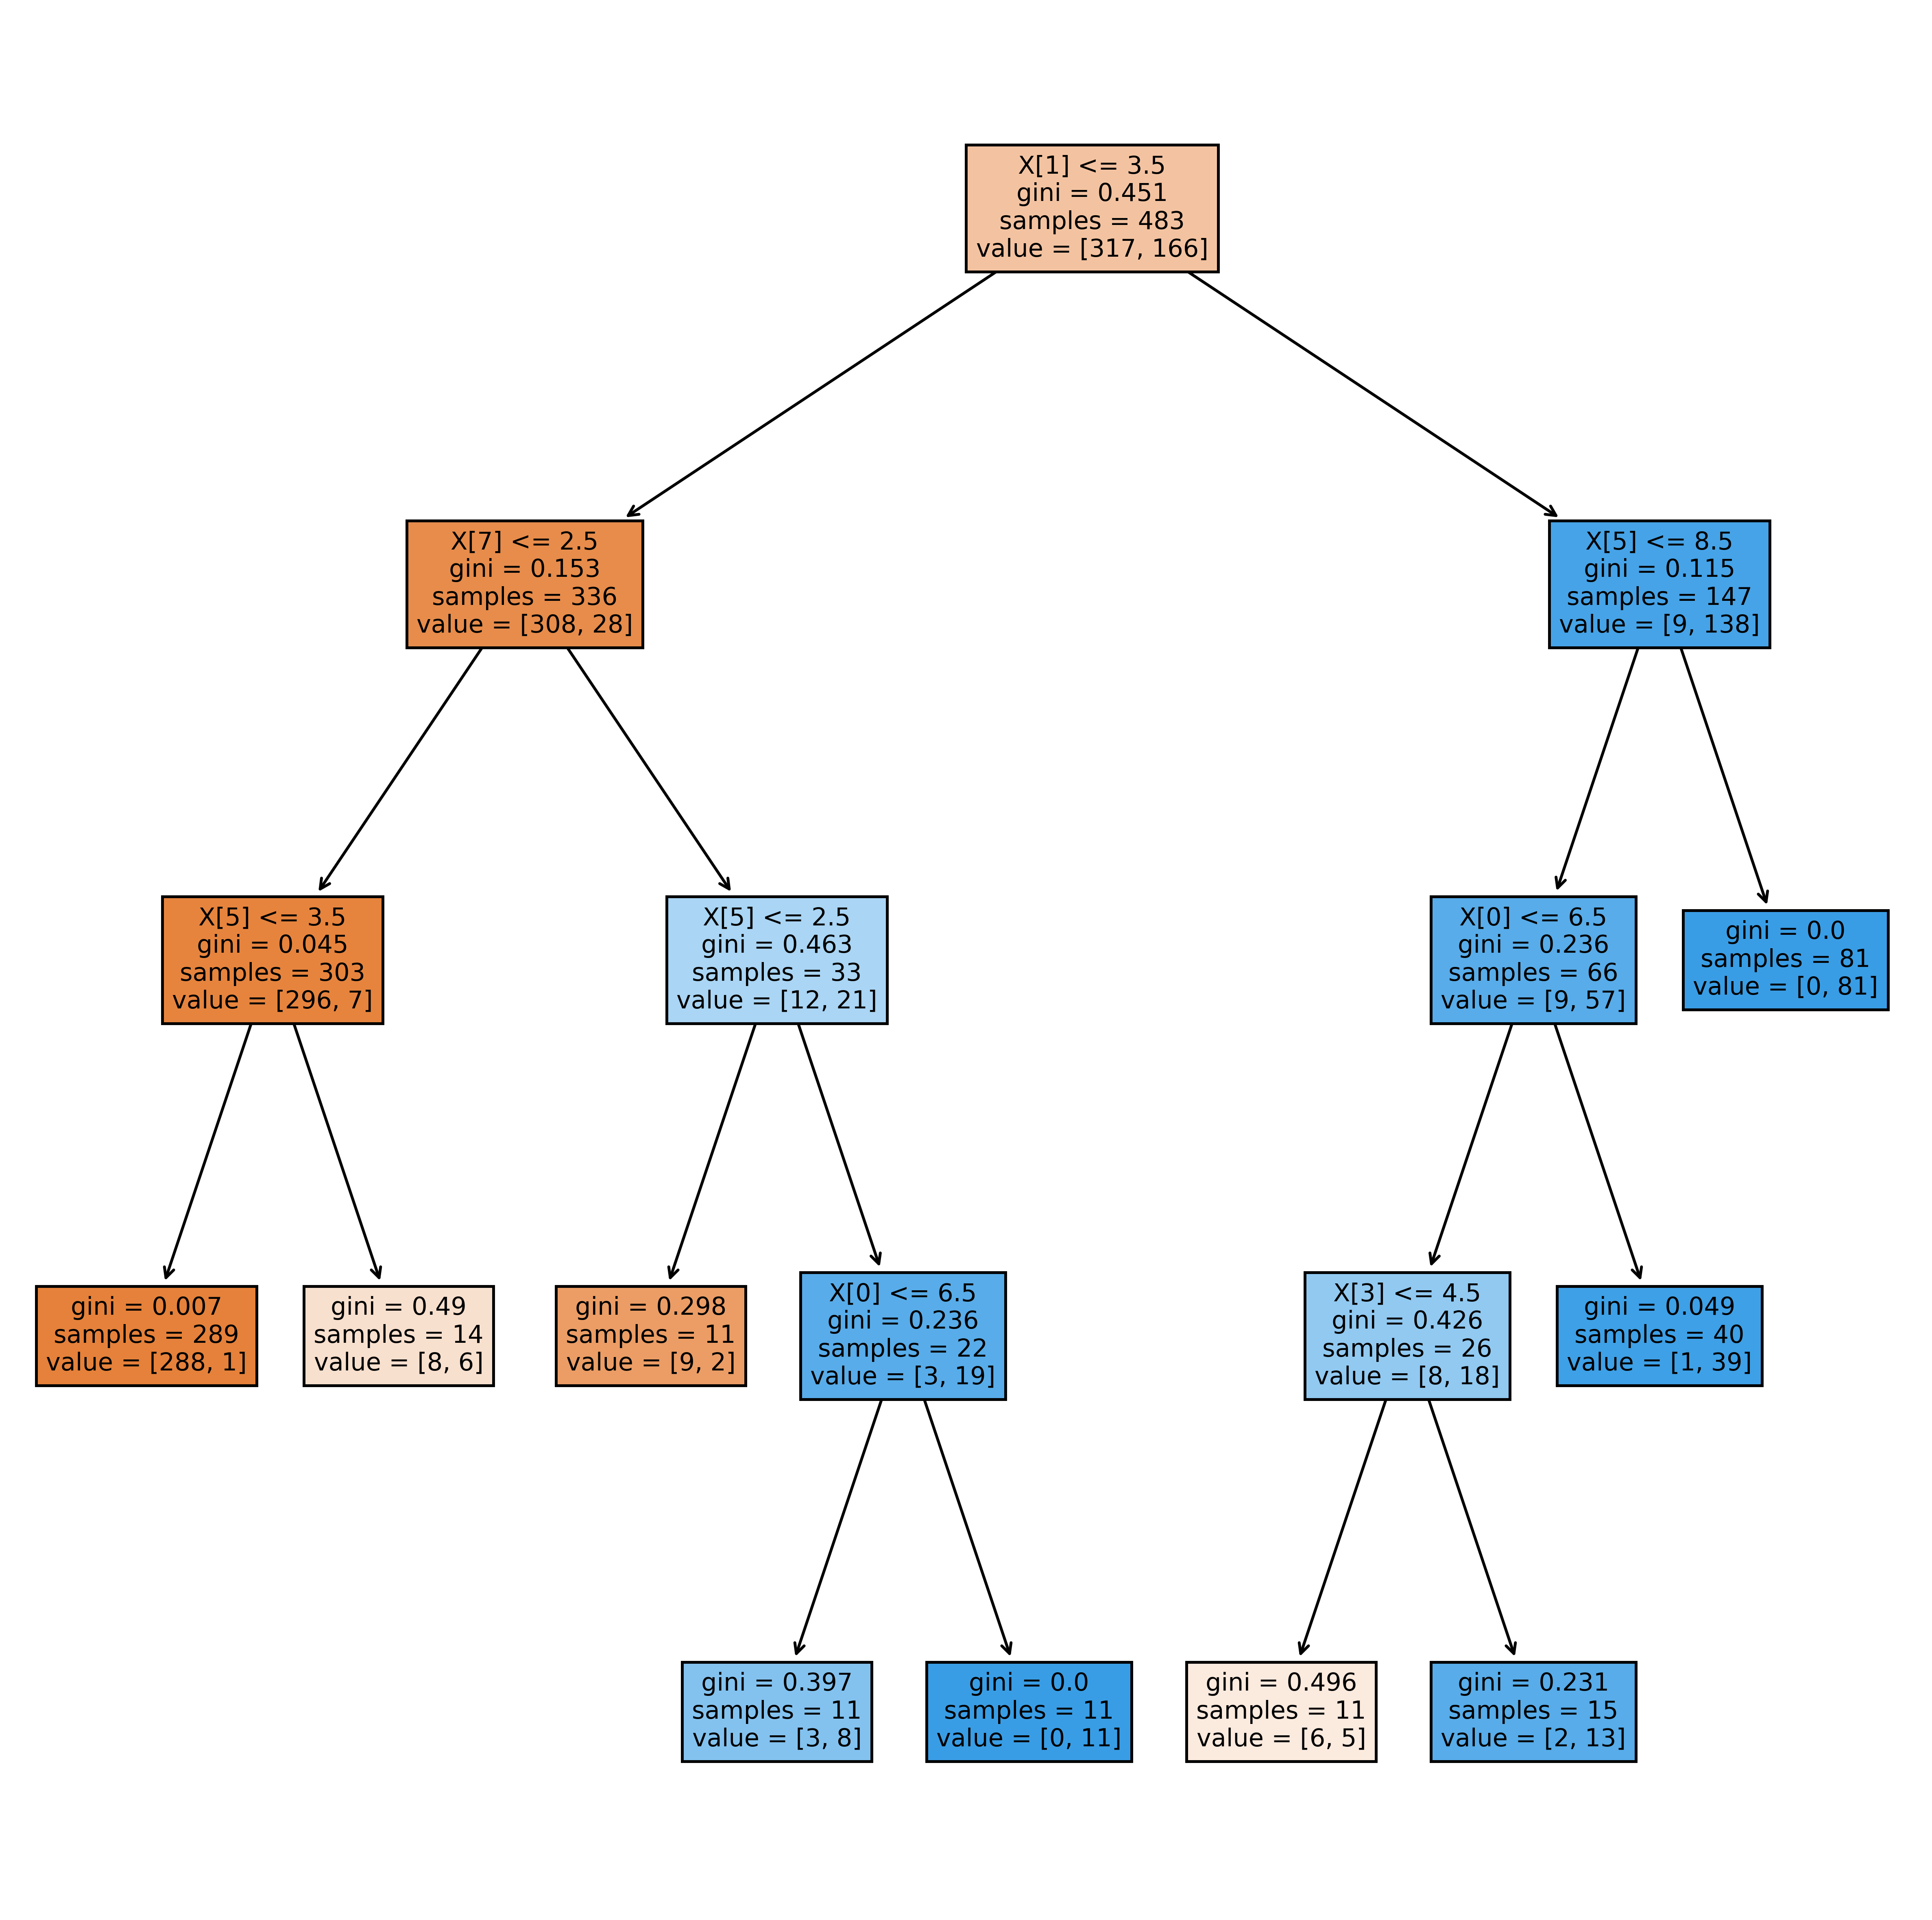

In [101]:
#plot the decision tree
plt.figure(figsize=(12, 12), dpi=500)
plot_tree(best_model, filled=True)
plt.show()

# Random Forest

In [102]:
#Random Forest
#create a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

#fit data to model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



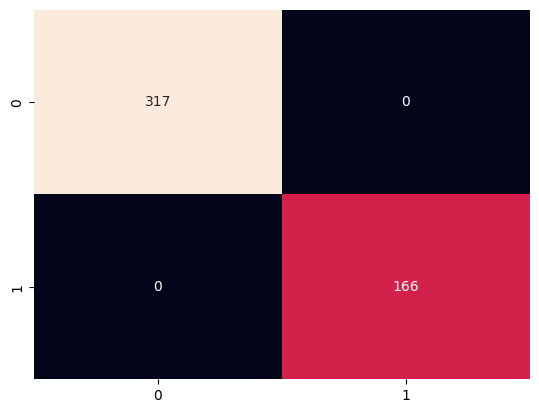

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       136
           1       0.95      0.96      0.95        72

    accuracy                           0.97       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.97      0.97      0.97       208



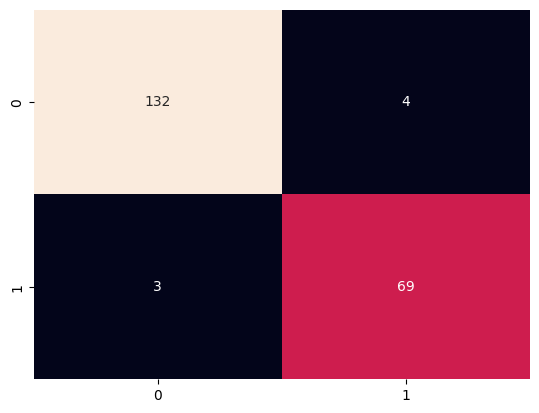

In [103]:
#evaluate the model
ytrain_pred = rfc.predict(X_train)

#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = rfc.predict(X_test)

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()

### Gridsearch

In [104]:
#grid search for hyperparameter tuning on Random forest
param_grid = {'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'n_estimators': np.arange(10,1000,20),
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_jobs': [-1],
              'oob_score': [True, False],
              'verbose' : [1],
              'warm_start': [True, False]}

#initialize the grid search object
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc',verbose=1, n_jobs=-1)

#fit the data to the grid search object
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)

#best parameters
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.1s


{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 830, 'n_jobs': -1, 'oob_score': False, 'verbose': 1, 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 830 out of 830 | elapsed:    0.2s finished


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 830 out of 830 | elapsed:    0.0s finished


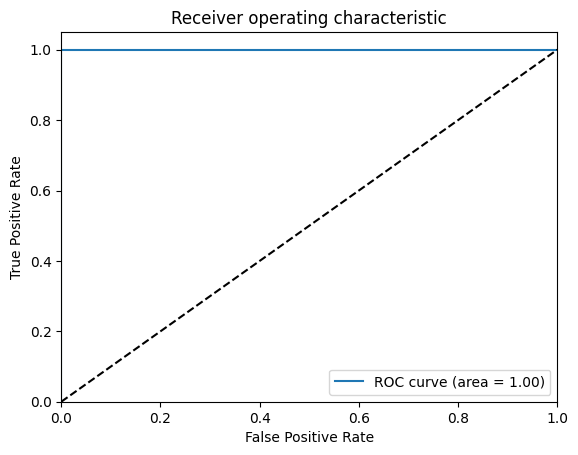

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s


------------------------------------------------------


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 830 out of 830 | elapsed:    0.0s finished


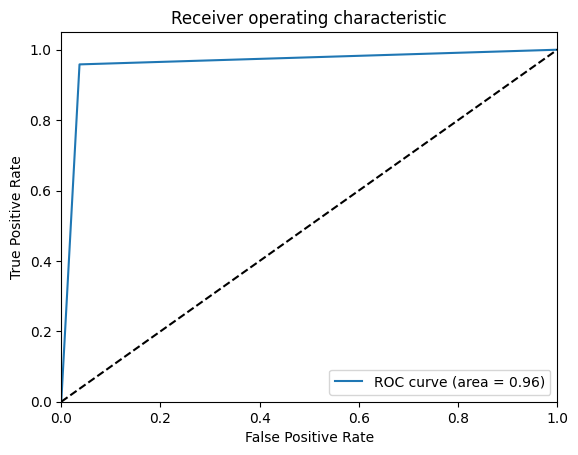

In [105]:
#evaluate the model
ytrain_pred = best_model.predict(X_train)

#evaluate the model usinf roc_curve and roc_auc_score on train data
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred)
roc_auc = roc_auc_score(y_train, ytrain_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("------------------------------------------------------")

#evaluate the model
ytest_pred = best_model.predict(X_test)

#evaluate the model usinf roc_curve and roc_auc_score on test data
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)
roc_auc = roc_auc_score(y_test, ytest_pred)

#plot the roc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       166

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



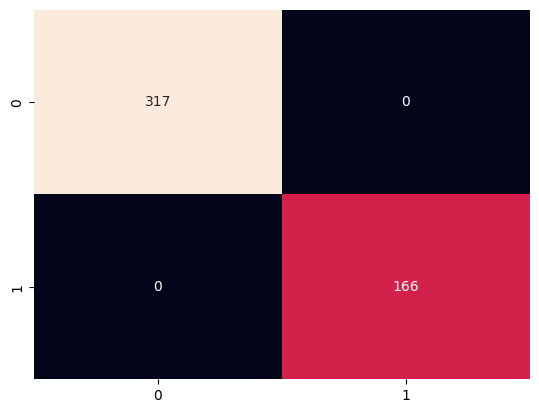

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.93      0.96      0.95        72

    accuracy                           0.96       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208



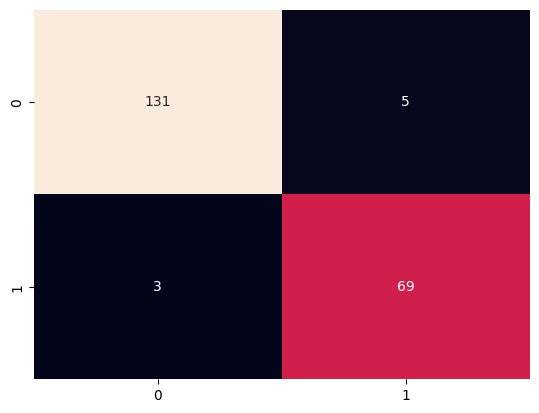

In [106]:
#evaluate the model
print(classification_report(y_train, ytrain_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_train, ytrain_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d')
plt.show()

print("------------------------------------------------------")

#evaluate the model
print(classification_report(y_test, ytest_pred))

#confusion matrix as a heatmap
cm = confusion_matrix(y_test, ytest_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt="d")
plt.show()